## Imports

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
import joblib

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading and Preprocessing

In [77]:
df = pd.read_csv("./data/heart.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [79]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [80]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [81]:
df["target"].value_counts()

,count
target,
1,526
0,499


## Visualisation + EDA

In [82]:
numerical_feats = ["age", "trestbps", "chol", "thalach"]

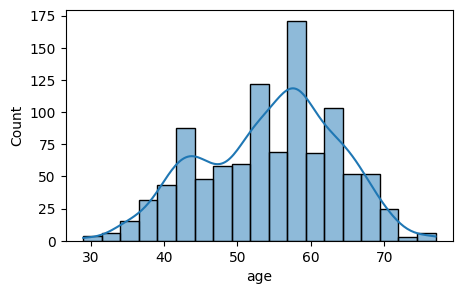

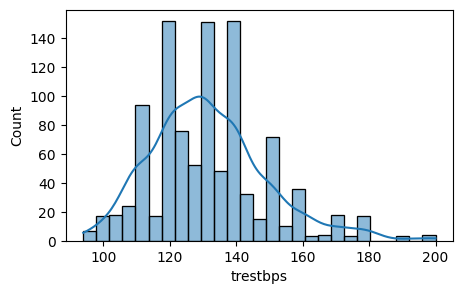

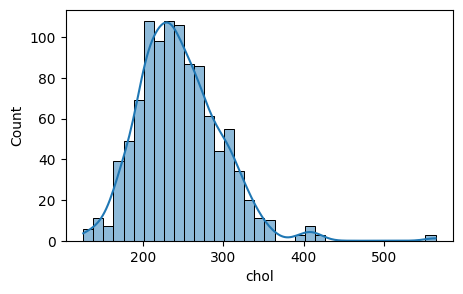

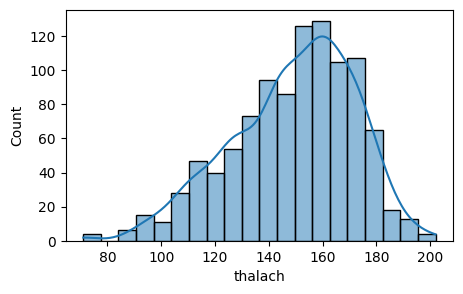

In [83]:
for feat in numerical_feats:
  plt.figure(figsize=(5, 3))
  sns.histplot(data=df, x=feat, kde=True)
  plt.show()

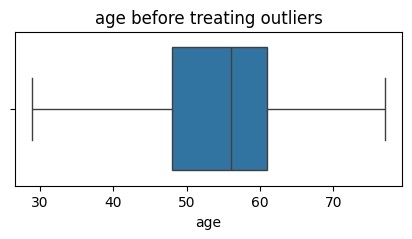

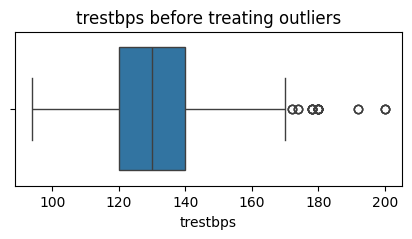

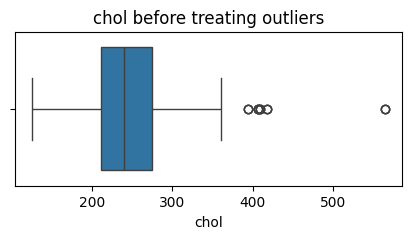

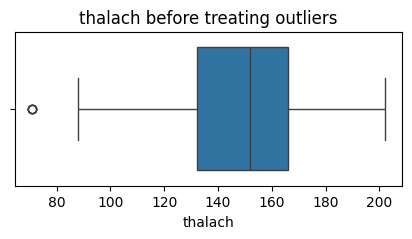

In [84]:
for feat in numerical_feats:
  plt.figure(figsize=(5, 2))
  plt.title(f"{feat} before treating outliers")
  sns.boxplot(data=df, x=feat)
  plt.show()

In [85]:
def remove_outliers(feat):
  Q1 = df[feat].quantile(0.25)
  Q3 = df[feat].quantile(0.75)

  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  return df[(df[feat] >= lower_bound) & (df[feat] <= upper_bound)]

In [86]:
for feat in numerical_feats:
  df = remove_outliers(feat)

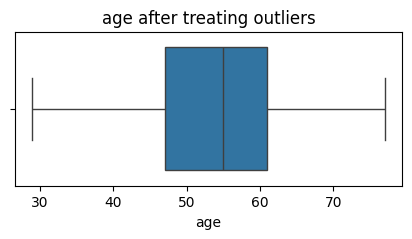

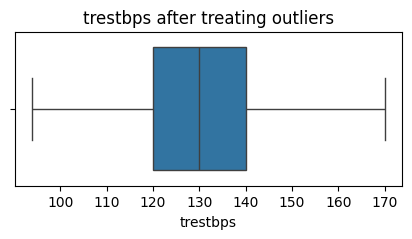

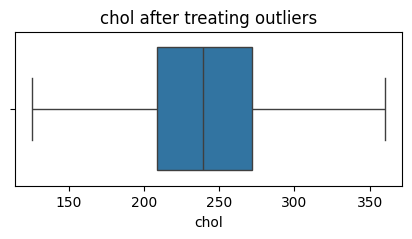

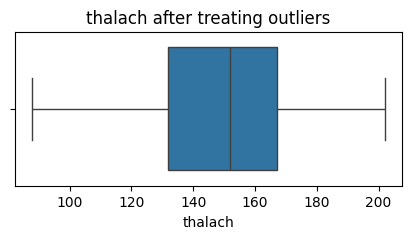

In [87]:
for feat in numerical_feats:
  plt.figure(figsize=(5, 2))
  plt.title(f"{feat} after treating outliers")
  sns.boxplot(data=df, x=feat)
  plt.show()

<Axes: >

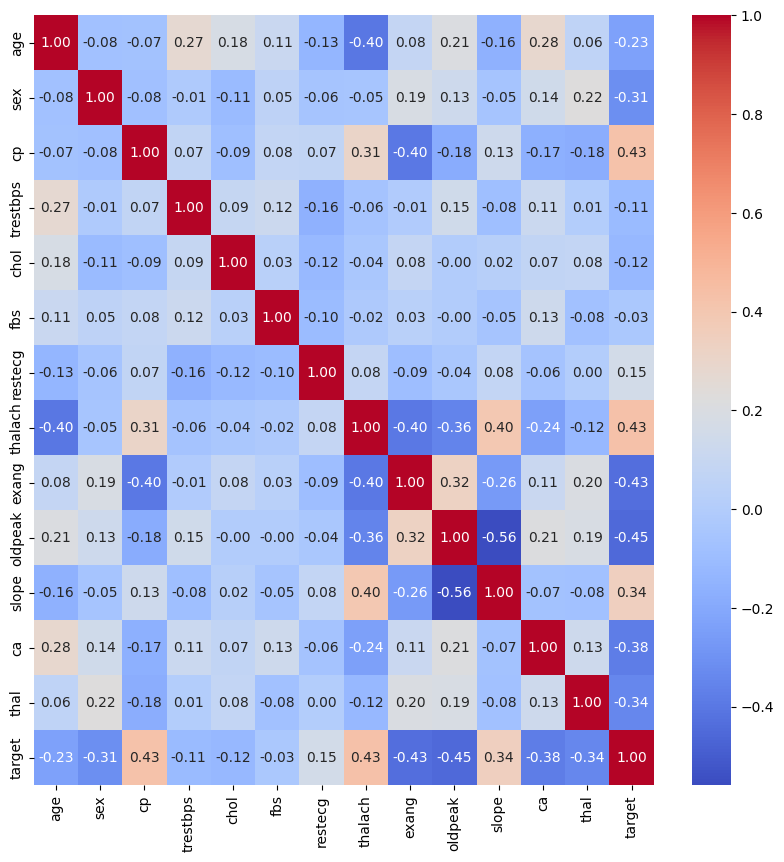

In [88]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

## Model Building and Selection

In [89]:
X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [90]:
X

array([[-0.23093086,  0.63154748, -0.92761446, ...,  0.97662907,
         1.21210931,  1.10790937],
       [-0.12104429,  0.63154748, -0.92761446, ..., -2.27880117,
        -0.73005433,  1.10790937],
       [ 1.74702745,  0.63154748, -0.92761446, ..., -2.27880117,
        -0.73005433,  1.10790937],
       ...,
       [-0.78036372,  0.63154748, -0.92761446, ..., -0.65108605,
         0.24102749, -0.49715992],
       [-0.45070401, -1.58341222, -0.92761446, ...,  0.97662907,
        -0.73005433, -0.49715992],
       [-0.01115771,  0.63154748, -0.92761446, ..., -0.65108605,
         0.24102749,  1.10790937]])

In [91]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

params = {
    "Logistic Regression": {
        "C": [0.1, 10, 10, 100],
        "solver": ["lbfgs", "liblinear"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10, 100],
        "kernel": ["linear", "rbf", "poly"]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"]
    }
}

In [94]:
results = {}

In [95]:
for name, classifier in classifiers.items():
  print(f"Training {name}...")
  grid_search = GridSearchCV(classifier, params[name], cv=5, n_jobs=-1)
  grid_search.fit(X_train, y_train)

  best_model = grid_search.best_estimator_

  y_pred = best_model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)

  results[name] = {
      "Best Model": best_model,
      "Accuracy": accuracy,
      "Report": report
  }

  print(f"Classifier: {name}")
  print(f"Best Model: {best_model}")
  print(f"Accuracy: {accuracy:.2f}")
  print("Classification Report:")
  print(report)
  print("=" * 50)

Training Logistic Regression...
Classifier: Logistic Regression
Best Model: LogisticRegression(C=0.1)
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.84      0.91      0.87       106

    accuracy                           0.86       195
   macro avg       0.86      0.85      0.85       195
weighted avg       0.86      0.86      0.86       195

Training Random Forest...
Classifier: Random Forest
Best Model: RandomForestClassifier(max_depth=10, n_estimators=50)
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        89
           1       1.00      0.97      0.99       106

    accuracy                           0.98       195
   macro avg       0.98      0.99      0.98       195
weighted avg       0.99      0.98      0.98       195

Training Support Vector Machine...
Classifier: Sup

In [96]:
model_names = list(results.keys())
accuracies = [results[name]["Accuracy"] for name in model_names]

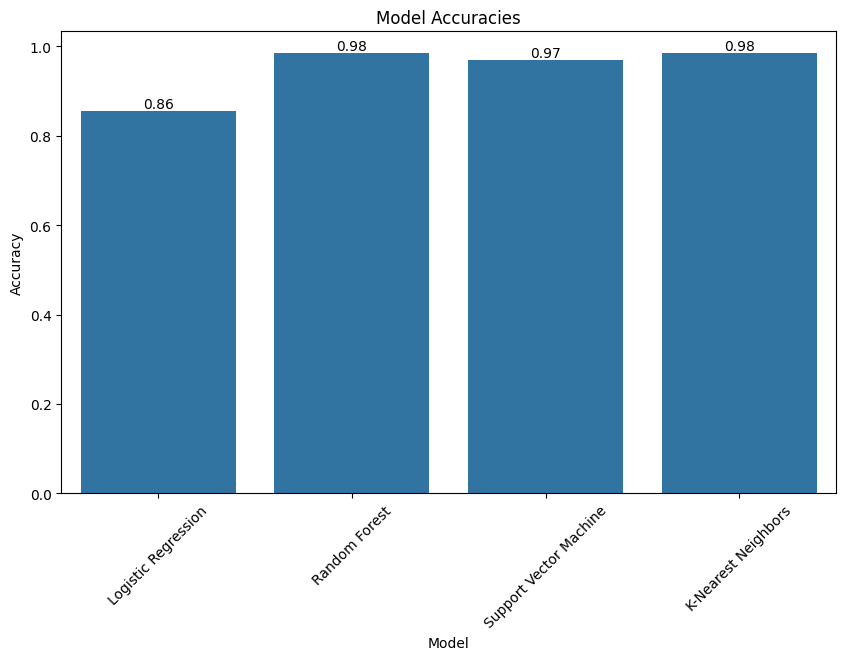

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.xticks(rotation=45)

for i, accuracy in enumerate(accuracies):
  plt.text(i, accuracy, f"{accuracy:.2f}", ha="center", va="bottom")

Text(0.5, 1.0, 'Confusion Matrix')

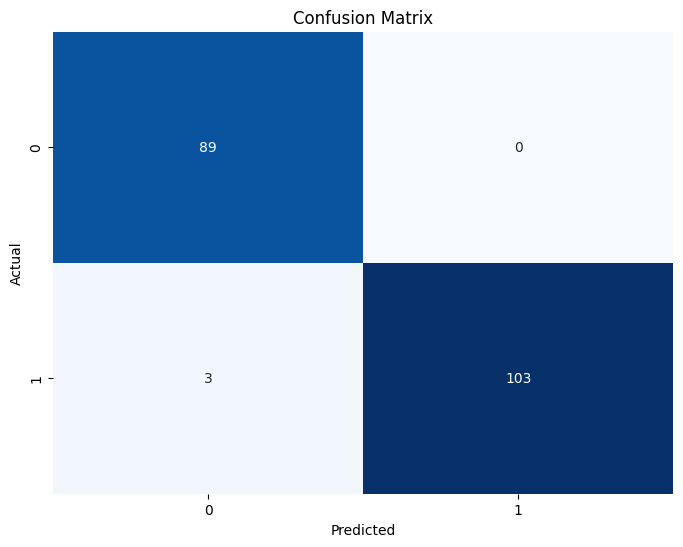

In [98]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [99]:
best_model_name = max(results, key=lambda x: results[x]["Accuracy"])
best_model = results[best_model_name]["Best Model"]

In [100]:
best_model

RandomForestClassifier(max_depth=10, n_estimators=50)

In [103]:
joblib.dump(best_model, "best_model.pkl")
best_model = joblib.load("best_model.pkl")